# cadCAD Experiment

In [2]:
import matplotlib.pyplot as plt
from model.run import run

df = run()

print(df)


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: local_proc
Configuration Count: 1
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (90, 7, 1, 5)
Execution Method: local_simulations
SimIDs   : [0]
SubsetIDs: [0]
Ns       : [0]
ExpIDs   : [0]
Execution Mode: single_threaded
Total execution time: 0.33s
     allocated_funds                                            brokers  \
8         155.308736  {25: <model.model.broker.Broker object at 0x10...   
16        150.498483  {25: <model.model.broker.Broker object at 0x10...   
24        155.106669  {25: <model.model.broker.Broker object at 0x10...   
32        159.044489  {25: <model.model.broker.Broker object at 0x10...   
40        131.772521  {25: <model.model.broker.Broker object at 0x10...   
48        174.077822  {25: <model.model.broker.Broker obj

![title](agreement.png)

# Cumulative Claimed Rewards
This shows that the cumulative rewards continues to rise even though each broker eventually leaves the system and their rewards become fixed.  They are of similar heights (ie. same rewards) because they all use the same policies to join and leave.

In [4]:
import pandas as pd
df1 = df.reset_index().brokers

broker_holdings = {}
broker_claimable = {}
broker_holdings_plus_claimable = {}
timestep = 0
for broker_dict in df1:
    for broker_id, broker in broker_dict.items():
        if broker_id not in broker_holdings:
            broker_holdings[broker_id] = {}
            broker_claimable[broker_id] = {}
            broker_holdings_plus_claimable[broker_id] = {}
        broker_holdings[broker_id][timestep] = broker.holdings
        broker_claimable[broker_id][timestep] = broker.claimable_funds
        broker_holdings_plus_claimable[broker_id][timestep] = broker.holdings + broker.claimable_funds
        
    timestep += 1

Text(0,0.5,'Broker Holdings')

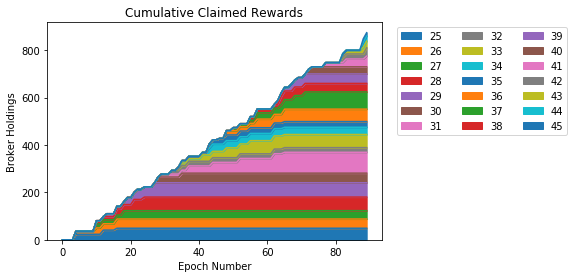

In [6]:


df_plot = pd.DataFrame(broker_holdings)
df_plot.plot(kind='area')
plt.gca().legend(loc=9, bbox_to_anchor=(1.3, 1), ncol=3)
plt.title('Cumulative Claimed Rewards')
plt.xlabel('Epoch Number')
plt.ylabel('Broker Holdings')

# Cumulative Unclaimed Rewards

This shows that the rewards are all claimed eventually, and the unclaimed rewards do not grow unbounded which would represent a leak in the system.


Text(0,0.5,'Broker Claimable Funds')

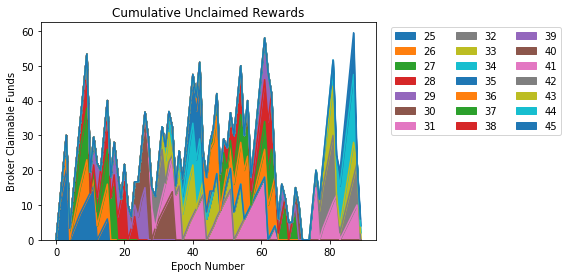

In [8]:
df_plot = pd.DataFrame(broker_claimable)
df_plot.plot(kind='area')
plt.gca().legend(loc=9, bbox_to_anchor=(1.3, 1), ncol=3)
plt.title('Cumulative Unclaimed Rewards')
plt.xlabel('Epoch Number')
plt.ylabel('Broker Claimable Funds')

# Plot to show Claimed Rewards + Unclaimed Rewards
This shows a straight line is monotonically increasing rewards, as a sanity check that the amount of rewards per epoch is a constant.

Text(0,0.5,'Broker Claimable Funds')

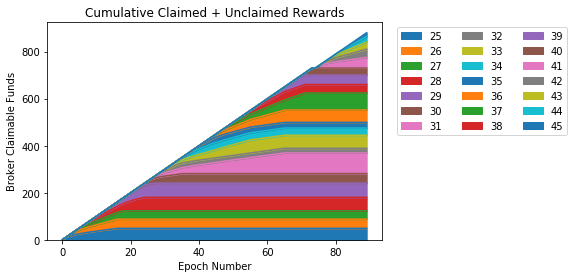

In [10]:
df_plot = pd.DataFrame(broker_holdings_plus_claimable)
df_plot.plot(kind='area')
plt.gca().legend(loc=9, bbox_to_anchor=(1.3, 1), ncol=3)
plt.title('Cumulative Claimed + Unclaimed Rewards')
plt.xlabel('Epoch Number')
plt.ylabel('Broker Claimable Funds')


# Twinned x axis, Number of Member Brokers vs Total Broker Stake.  

This plot shows that each broker has exactly $5 staked on average.




Text(0,0.5,'Total Broker Stake')

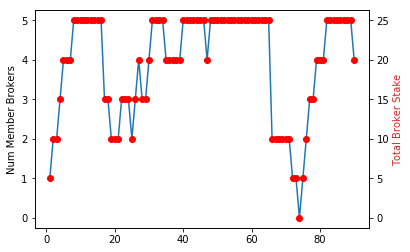

In [12]:
fig, ax1 = plt.subplots()

ax1.plot(df.timestep, df.num_member_brokers, label='test1')
ax1.set_ylabel('Num Member Brokers')
ax2 = ax1.twinx()
ax2.plot(df.timestep, df.total_broker_stake, 'ro', label='test2')
ax2.set_ylabel('Total Broker Stake', color = 'tab:red')


In [14]:
df['members'] = df.brokers.apply(lambda x: [v.id for v in x.values() if v.member])

In [16]:
df.members

8                      [25]
16                 [25, 26]
24                 [25, 26]
32             [25, 26, 27]
40         [25, 26, 27, 28]
48         [25, 26, 27, 28]
56         [25, 26, 27, 28]
64     [25, 26, 27, 28, 29]
72     [25, 26, 27, 28, 29]
80     [25, 26, 27, 28, 29]
88     [25, 26, 27, 28, 29]
96     [25, 26, 27, 28, 29]
104    [25, 26, 27, 28, 29]
112    [25, 26, 27, 28, 29]
120    [25, 26, 27, 28, 29]
128    [25, 26, 27, 28, 29]
136            [27, 28, 29]
144            [27, 28, 29]
152                [28, 29]
160                [28, 29]
168                [28, 29]
176            [28, 29, 30]
184            [28, 29, 30]
192            [28, 29, 30]
200                [29, 30]
208            [29, 30, 31]
216        [29, 30, 31, 32]
224            [30, 31, 32]
232            [30, 31, 32]
240        [30, 31, 32, 33]
               ...         
488    [31, 36, 37, 38, 39]
496    [31, 36, 37, 38, 39]
504    [31, 36, 37, 38, 39]
512    [31, 36, 37, 38, 39]
520    [31, 36, 37, 

In [18]:
broker_ids = [v.id for v in df.brokers.values[-1].values()]

In [20]:
df['broker_stakes'] = df.brokers.apply(lambda x: [(v.member, v.stake) for v in x.values()])

In [22]:
def check(x):
    if x[0]:
        if x[1]==5:
            #return "member with correct stake"
            return True
        else:
            #return "member with incorrect stake"
            return False
    else:
        if x[1]==0:
            #return "nonmember with correct stake"
            return True
        else:
            #return "nonmember with incorrect stake"
            return False

In [24]:
df.broker_stakes.apply(lambda z: [check(x) for x in z])  

8                                                 [True]
16                                          [True, True]
24                                          [True, True]
32                                    [True, True, True]
40                              [True, True, True, True]
48                              [True, True, True, True]
56                              [True, True, True, True]
64                        [True, True, True, True, True]
72                        [True, True, True, True, True]
80                        [True, True, True, True, True]
88                        [True, True, True, True, True]
96                        [True, True, True, True, True]
104                       [True, True, True, True, True]
112                       [True, True, True, True, True]
120                       [True, True, True, True, True]
128                       [True, True, True, True, True]
136                       [True, True, True, True, True]
144                       [True

In [26]:
df['broker_based_total_stake'] = df.broker_stakes.apply(lambda z: sum([x[1] for x in z if x[0]]))

In [28]:
df['broker_based_total_stake']

8       5
16     10
24     10
32     15
40     20
48     20
56     20
64     25
72     25
80     25
88     25
96     25
104    25
112    25
120    25
128    25
136    15
144    15
152    10
160    10
168    10
176    15
184    15
192    15
200    10
208    15
216    20
224    15
232    15
240    20
       ..
488    25
496    25
504    25
512    25
520    25
528    10
536    10
544    10
552    10
560    10
568    10
576     5
584     5
592     0
600     5
608    10
616    15
624    15
632    20
640    20
648    20
656    25
664    25
672    25
680    25
688    25
696    25
704    25
712    25
720    20
Name: broker_based_total_stake, Length: 90, dtype: int64